**This notebook demonstrates how to clean the dataset, handle categorical variables, scale features, and apply PCA to reduce dimensionality while retaining 98% variance.**

# **Step 1: Choose a dataset**
I  chosen the "Airbnb_Data.csv" dataset – a property listing dataset containing information like price, property type, room type, amenities, etc.

## **Step 2: Load the Dataset**

In [1]:
# The pandas library use to read a CSV file that the uploads manually in Google Colab.
# It converts the contents of the CSV file into a pandas DataFrame, which allows for effective data manipulation and analysis.
import pandas as pd
# Upload CSV file manually in Google Colab
from google.colab import files

uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read CSV file into a DataFrame
df = pd.read_csv(file_name)

Saving Airbnb_Data.csv to Airbnb_Data.csv


In [3]:
df.shape

(74111, 29)

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


## **Step 3: Drop Irrelevant Columns and Handle missing values**
Remove columns like IDs, names, URLs, and amenities ... which are not useful for numerical PCA.

In [7]:
# Drop high-missing or non-numeric columns
df = df.drop(columns=[
    'first_review', 'last_review', 'host_response_rate', 'thumbnail_url',
    'host_since', 'neighbourhood', 'zipcode', 'description', 'amenities', 'name'
])

Impute numeric missing values with mean (Fills missing values with average number)

In [8]:
# Impute numeric missing values with mean
from sklearn.impute import SimpleImputer

num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [9]:
# Impute categorical with most frequent->Fills missing values with most common value
cat_cols = ['host_has_profile_pic', 'host_identity_verified']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [10]:
df.shape

(74111, 19)

In [11]:
df.head()


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,40.696524,-73.991617,2,100.000000,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,40.766115,-73.989040,6,93.000000,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.808110,-73.943756,10,92.000000,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,f,37.772004,-122.431619,0,94.067365,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,38.925627,-77.034596,4,40.000000,0.0,1.0


# **Step:4**
1. Extract numeric features

2. Standardize (mean normalization)

3. Compute covariance matrix Σ

4. Apply SVD

5. Choose K features to retain 98% variance

6. Project data to K dimensions

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select only numerical features for PCA
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df)

<bound method DataFrame.count of              id  log_price  accommodates  bathrooms   latitude   longitude  \
0       6901257   5.010635             3        1.0  40.696524  -73.991617   
1       6304928   5.129899             7        1.0  40.766115  -73.989040   
2       7919400   4.976734             5        1.0  40.808110  -73.943756   
3      13418779   6.620073             4        1.0  37.772004 -122.431619   
4       3808709   4.744932             2        1.0  38.925627  -77.034596   
...         ...        ...           ...        ...        ...         ...   
74106  14549287   4.605170             1        1.0  40.709025  -73.939405   
74107  13281809   5.043425             4        2.0  33.871549 -118.396053   
74108  18688039   5.220356             5        1.0  40.706749  -73.942377   
74109  17045948   5.273000             2        1.0  40.738535  -74.000157   
74110   3534845   4.852030             4        1.0  33.761096 -118.192409   

       number_of_reviews  revi

In [14]:
# Step 2: Standardize (mean normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

In [15]:
# Step 3: Compute covariance matrix Sigma
Sigma = np.cov(X_scaled.T)  # Transpose to shape (features, samples)

In [16]:
# Step 4: Apply SVD on covariance matrix
U, S, Vt = np.linalg.svd(Sigma)

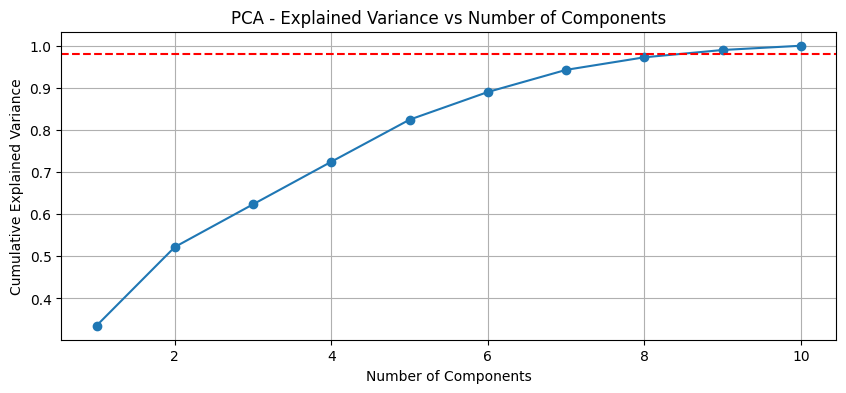

In [26]:
# Step 5: Calculate explained variance ratio
explained_variance = S / np.sum(S)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance to visualize
plt.figure(figsize=(10,4))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('PCA - Explained Variance vs Number of Components')
plt.axhline(y=0.98, color='r', linestyle='--')
plt.show()

In [18]:


# Step 6: Select number of components K to retain 98% variance
K = np.argmax(cumulative_variance >= 0.98) + 1  # Find the first index where variance ≥ 98%
print(f"Number of components selected: {K}")

# Step 7: Reduce dimensions using the selected components
X_reduced = X_scaled @ U[:, :K]  # Project original data onto the top K principal components
print("Shape of reduced dataset:", X_reduced.shape)


Number of components selected: 9
Shape of reduced dataset: (74111, 9)


In [19]:
# Step 6: Choose number of components K for 98% variance
K = np.argmax(cumulative_variance >= 0.98) + 1
print(f"Number of components to retain 98% variance: {K}")


Number of components to retain 98% variance: 9


In [20]:
# Step 7: Project data onto top K principal components
U_reduce = U[:, :K]
Z = X_scaled.dot(U_reduce)  # Reduced dimension data
print("Shape after PCA:", Z.shape)

Shape after PCA: (74111, 9)


## **Step 5: Summary**

In this assignment, the **Airbnb dataset** was preprocessed by handling missing values, dropping irrelevant columns, and imputing numerical and categorical data. Feature scaling was applied to normalize the dataset before performing **Principal Component Analysis (PCA)**.

PCA was conducted by:

**Computing the Covariance Matrix (Σ)**

**Applying Singular Value Decomposition (SVD)**

**Selecting the optimal number of components (K)** to retain **98% of the variance**

The cumulative explained variance graph was used to determine the appropriate number of principal components for dimensionality reduction.


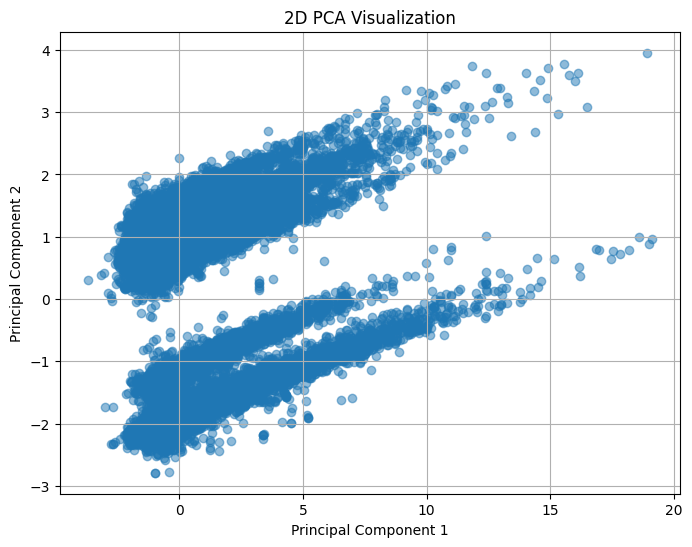

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.grid(True)
plt.show()


In [22]:
print(f"Original feature shape: {X_scaled.shape}") # Changed X_preprocessed to X_scaled
print(f"Reduced feature shape (98% variance): {Z.shape}") # Changed X_reduced to Z

Original feature shape: (74111, 10)
Reduced feature shape (98% variance): (74111, 9)


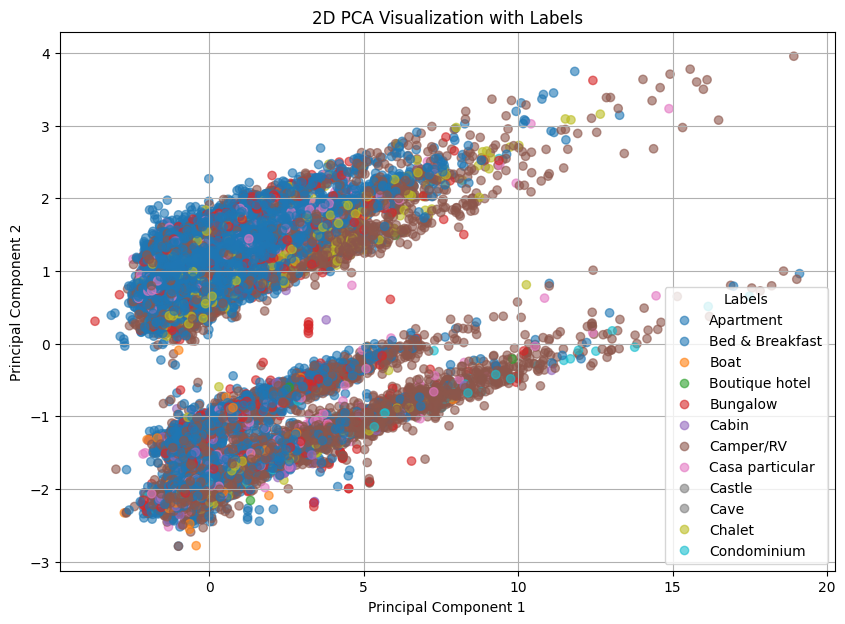

In [29]:
labels = df['property_type']

# Convert string labels to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
numeric_labels = le.fit_transform(labels)


plt.figure(figsize=(10, 7))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=numeric_labels, cmap='tab10', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization with Labels')
plt.grid(True)

# Optional: Add legend (works well if labels are numeric or have few unique values)
handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Labels") # Use le.classes_ to get original labels

plt.show()